
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - Regression <br>
<font color=696880 size=4>
Mahan Bayhaghi & Arash Ziyaei Razban


____

## Personal Data

In [1]:
# please fill in your student number and name
student_number = '401106396'
Name = 'mobina'
Last_Name = 'kochaknia'

In this notebook, we will implement regression methods. We will start from simple Linear Regression and make our way towards more complicated regressors as well.

##Libraries

You are not allowed to use sklearn ready regression methods.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Linear and Polynomieal Regression (60 points)


### Linear Regression (10 points)


Linear regression assumes a linear relationship between the input features and the output. The model predicts $ y $ using the equation:

$$
y = \mathbf{Xw} + b
$$

Here:
- $ \mathbf{X} $: The matrix of input features.
- $ \mathbf{w} $: The weight vector (parameters).
- $ b $: The bias term.
- $ y $: The predicted output.

The objective is to find $ \mathbf{w} $ and $ b $ that minimize the error between predicted and actual values. The error is typically measured using the **Mean Squared Error (MSE):**

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$


The optimal solution for $ \mathbf{w} $ and $ b $ can be computed directly using the closed-form equation:

$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

Where:
- $ \mathbf{X}^T $: Transpose of the feature matrix.
- $ (\mathbf{X}^T \mathbf{X})^{-1} $: Inverse of the Gram matrix.

For simplicity, $ b $ (bias) can be incorporated into $ \mathbf{X} $ by adding a column of ones.

We implement linear regression from scratch using a custom class `LinearRegressor`:

1. **Initialization:** The class stores model weights.
2. **Fitting the Model:** The `fit` method computes weights using the closed-form solution.
3. **Prediction:** The `predict` method uses the weights to make predictions for new data.


In [3]:
import numpy as np

class LinearRegressor:
    def __init__(self):
        """
        Initialize the LinearRegressor.
        The model will learn the parameters (weights and bias) using linear regression.
        """
        self.weights = None  # Model weights, including bias

    def fit(self, X, y):
        """
        Fits the linear regression model using the closed-form solution.

        Args:
        - X (ndarray): Input features of shape (n_samples, n_features).
        - y (ndarray): Target values of shape (n_samples,).
        """
        # Add a column of ones to X to include the bias term in the weight vector
        X_bias = np.hstack([np.ones((X.shape[0], 1)), X])

        # Compute weights using the closed-form solution: w = (X.T X)^-1 X.T y
        self.weights = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

    def predict(self, X):
        """
        Predicts target values using the fitted model.

        Args:
        - X (ndarray): Input features of shape (n_samples, n_features).

        Returns:
        - ndarray: Predicted values of shape (n_samples,).
        """
        if self.weights is None:
            raise ValueError("Model is not fitted yet. Please call `fit` before `predict`.")

        # Add a column of ones to X to include the bias term in the prediction
        X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        return X_bias @ self.weights


In this section, generate a synthetic linear dataset and utilize the implemented LinearRegressor to fit and evaluate it. Your calculated weights and real weights must be similar:

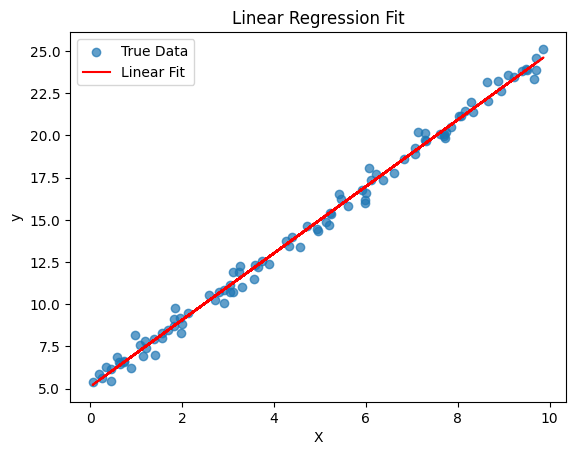

True Weights and Bias:
Weight: 2, Bias: 5

Calculated Weights and Bias:
Weight: 1.977, Bias: 5.108


In [4]:
# Generate a synthetic dataset
np.random.seed(42)  # For reproducibility
n_samples = 100
X = np.random.rand(n_samples, 1) * 10  # Random features in the range [0, 10]
true_weights = np.array([2])  # True weight
bias = 5  # True bias
noise = np.random.randn(n_samples, 1) * 0.5  # Add some noise
y = X @ true_weights + bias + noise.flatten()  # Generate target values

# Initialize and train the model
model = LinearRegressor()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Visualize the results
plt.scatter(X, y, label="True Data", alpha=0.7)
plt.plot(X, y_pred, color="red", label="Linear Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

# Display weights
calculated_weights = model.weights
print("True Weights and Bias:")
print(f"Weight: {true_weights[0]}, Bias: {bias}")
print("\nCalculated Weights and Bias:")
print(f"Weight: {calculated_weights[1]:.3f}, Bias: {calculated_weights[0]:.3f}")



### Polynomial Regression (25 points)


Polynomial Regression is an extension of Linear Regression that models the relationship between the dependent and independent variables as an nth-degree polynomial.

Given the features \(X\), polynomial regression tries to fit a model of the form:

$$
y = w_0 + w_1 X + w_2 X^2 + w_3 X^3 + \dots + w_n X^n
$$

Where:
- $X$ is the input feature.
- $w_0, w_1, \dots, w_n$ are the weights (coefficients) to be learned.
- $n$ is the degree of the polynomial.

To fit this model, we can use the same closed-form solution as in linear regression, but now the features include powers of $X$.


In [5]:
import numpy as np

class PolynomialRegressor:
    def __init__(self, degree=2):
        """
        Initialize the PolynomialRegressor.

        Args:
        - degree (int): The degree of the polynomial to fit.
        """
        self.degree = degree  # Degree of the polynomial
        self.weights = None   # Model weights, including bias

    def _polynomial_features(self, X):
        """
        Generate polynomial features for input data X up to the specified degree.

        Args:
        - X (ndarray): Input features of shape (n_samples, 1).

        Returns:
        - ndarray: Transformed polynomial features of shape (n_samples, degree + 1).
        """
        n_samples = X.shape[0]
        poly_features = np.ones((n_samples, self.degree + 1))  # Start with a column of ones for bias
        for i in range(1, self.degree + 1):
            poly_features[:, i] = X.flatten() ** i
        return poly_features

    def fit(self, X, y):
        """
        Fits the polynomial regression model using the closed-form solution.

        Args:
        - X (ndarray): Input features of shape (n_samples, 1).
        - y (ndarray): Target values of shape (n_samples,).
        """
        # Generate polynomial features
        X_poly = self._polynomial_features(X)

        # Compute weights using the closed-form solution: w = (X^T X)^-1 X^T y
        self.weights = np.linalg.pinv(X_poly.T @ X_poly) @ X_poly.T @ y

    def predict(self, X):
        """
        Predicts target values using the fitted polynomial regression model.

        Args:
        - X (ndarray): Input features of shape (n_samples, 1).

        Returns:
        - ndarray: Predicted values of shape (n_samples,).
        """
        if self.weights is None:
            raise ValueError("Model is not fitted yet. Please call `fit` before `predict`.")

        # Generate polynomial features for the input
        X_poly = self._polynomial_features(X)

        # Compute predictions
        return X_poly @ self.weights


Let's create a sample dataset of size 100 from following formula:

$$
y = x^4 - 4x^3 + 16 x + 4ϵ \ \ \ , \ \ \ x \in [-2, 2]
$$

where $\epsilon$ represents noise drawn from a $\mathcal{N}(0, 1)$ distribution.

The dataset will be split into 80% training data and 20% test data. Next, visualize the fitted polynomial curves for degrees ranging from 3 to 11. Additionally, compute and display the RMSE for both the training and test sets:

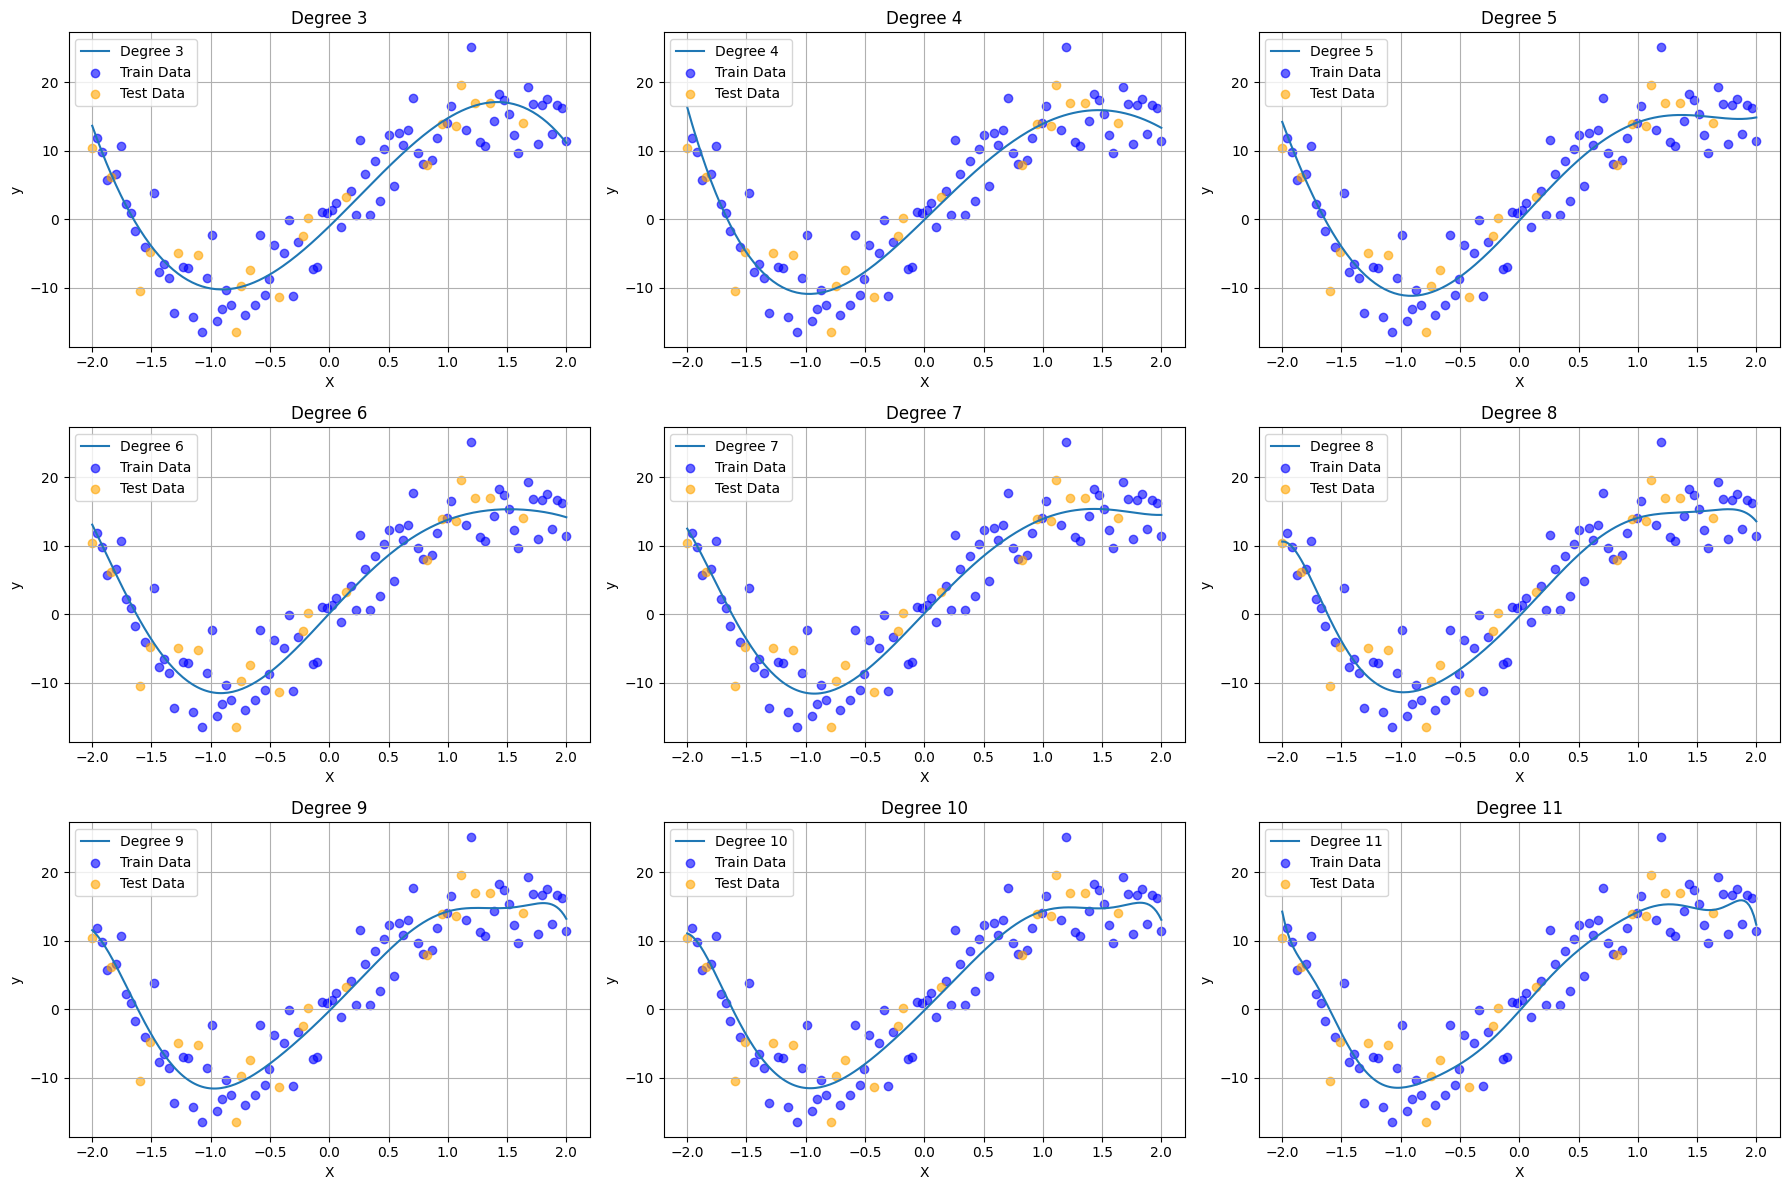

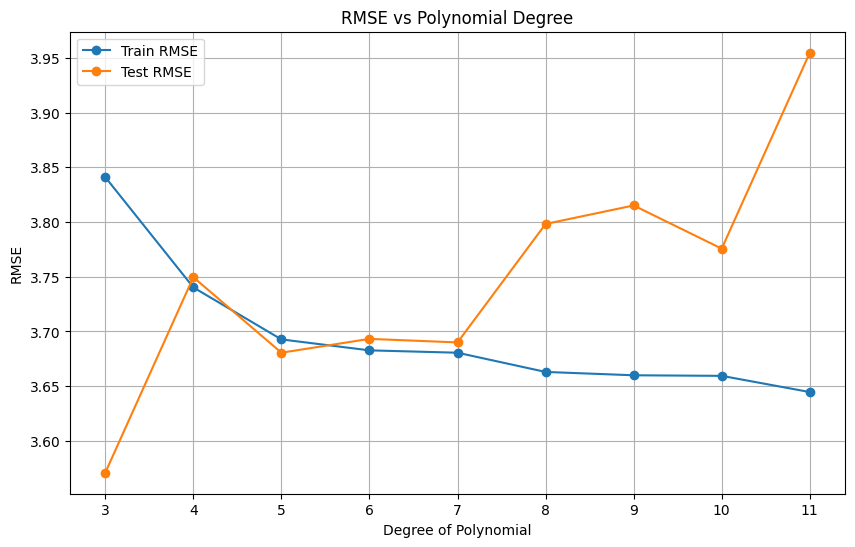

In [6]:
np.random.seed(42)
X = np.linspace(-2, 2, 100).reshape(-1, 1)
epsilon = np.random.normal(0, 1, size=X.shape[0])
y = (X**4 - 4*X**3 + 16*X + 4*np.random.normal(0, 1, size=X.shape)).flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = range(3, 12)
rmse_train = []
rmse_test = []

fig, axs = plt.subplots(len(degrees) // 3, 3, figsize=(18, 12))
axs = axs.flatten()

for idx, degree in enumerate(degrees):
    model = PolynomialRegressor(degree=degree)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmse_train.append(train_rmse)
    rmse_test.append(test_rmse)

    X_fit = np.linspace(-2, 2, 200).reshape(-1, 1)
    y_fit = model.predict(X_fit)
    axs[idx].plot(X_fit, y_fit, label=f"Degree {degree}")
    axs[idx].scatter(X_train.flatten(), y_train, color="blue", label="Train Data", alpha=0.6)
    axs[idx].scatter(X_test.flatten(), y_test, color="orange", label="Test Data", alpha=0.6)
    axs[idx].set_title(f"Degree {degree}")
    axs[idx].set_xlabel("X")
    axs[idx].set_ylabel("y")
    axs[idx].legend()
    axs[idx].grid(True)

for ax in axs[len(degrees):]:
    ax.axis("off")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(degrees, rmse_train, label="Train RMSE", marker="o")
plt.plot(degrees, rmse_test, label="Test RMSE", marker="o")
plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE")
plt.title("RMSE vs Polynomial Degree")
plt.legend()
plt.grid(True)
plt.show()

**Does this RMSE plot confirm your previous knowledge of the bias-variance tradeoff?**  

**Ans:**  Yes, the RMSE plots confirm the bias-variance tradeoff: low-degree models underfit (high bias, high RMSE), high-degree models overfit (high variance, test RMSE increases), and mid-degree models (e.g., degrees 5–6) achieve the best balance


**Could you explain the reason behind the change in RMSE behavior after a certain polynomial degree?**  

**Ans:**  The RMSE decreases with increasing polynomial degree initially as the model captures more complexity, reducing bias. After a certain degree, the model starts overfitting the training data, capturing noise instead of the true pattern, causing test RMSE to increase due to high variance.


### Regularization (25 points)

Polynomial Regression can be enhanced with **regularization** to reduce the risk of overfitting, especially when working with high-degree polynomials. Two common regularization techniques are **Ridge Regression** and **Lasso Regression**, which modify the cost function to penalize large coefficients.

1. **Ridge Regression (L2 Regularization)**:
   Ridge regression penalizes the sum of the squared coefficients. The modified cost function is:
   $$
   J(w) = \frac{1}{2m} \| y - Xw \|^2 + \lambda \| w \|^2
   $$
   - $ \lambda $: Regularization strength.
   - $ \| w \|^2 $: Sum of squared weights.

2. **Lasso Regression (L1 Regularization)**:
   Lasso regression penalizes the sum of the absolute coefficients. The modified cost function is:
   $$
   J(w) = \frac{1}{2m} \| y - Xw \|^2 + \lambda \| w \|_1
   $$
   - $ \| w \|_1 $: Sum of absolute weights.


**Gradient Descent** is an iterative optimization algorithm used to minimize the cost function. For polynomial regression with regularization, the gradient updates are:

- For **Ridge**:
   $$
   w = w - \eta \left[ \frac{\partial J(w)}{\partial w} \right] = w - \eta \left[ \frac{1}{m} X^T (Xw - y) + \frac{\lambda}{m} w \right]
   $$

- For **Lasso**:
   $$
   w = w - \eta \left[ \frac{1}{m} X^T (Xw - y) + \frac{\lambda}{m} \cdot \text{sign}(w) \right]
   $$
   Where:
   - $ \eta $ is the learning rate.
   - $ \text{sign}(w) $ is the sign of the weights.


In [7]:
class PolynomialRegressorGD:
    def __init__(self, degree=2, reg_type='ridge', reg_lambda=0.01, learning_rate=0.01, epochs=20000):
        self.degree = degree
        self.reg_type = reg_type
        self.reg_lambda = reg_lambda
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        X_poly = self._polynomial_features(X)
        self.scaler = StandardScaler()
        X_poly = self.scaler.fit_transform(X_poly)
        self.w = np.zeros(X_poly.shape[1])
        for i in range(self.epochs):
            gradients = self._compute_gradients(X_poly, y)
            self.w -= self.learning_rate * gradients

    def predict(self, X):
        X_poly = self._polynomial_features(X)
        X_poly = self.scaler.transform(X_poly)
        return np.dot(X_poly, self.w)

    def _polynomial_features(self, X):
        return np.hstack([X**i for i in range(self.degree + 1)])

    def _compute_gradients(self, X, y):
        m = len(y)
        predictions = np.dot(X, self.w)
        errors = predictions - y
        if self.reg_type == 'ridge':
            gradients = (2/m) * np.dot(X.T, errors) + (2 * self.reg_lambda / m) * self.w
        elif self.reg_type == 'lasso':
            gradients = (2/m) * np.dot(X.T, errors) + (self.reg_lambda / m) * np.sign(self.w)
        return gradients

Using the previously created sample dataset, fit a polynomial regression model of degree 11. Test the RMSE of the model with regularization parameter values $ \{0.05, 0.1, 0.5, 1, 5, 10\} $.  

Plot the results to visualize the effect of $ \lambda $ on model performance.  


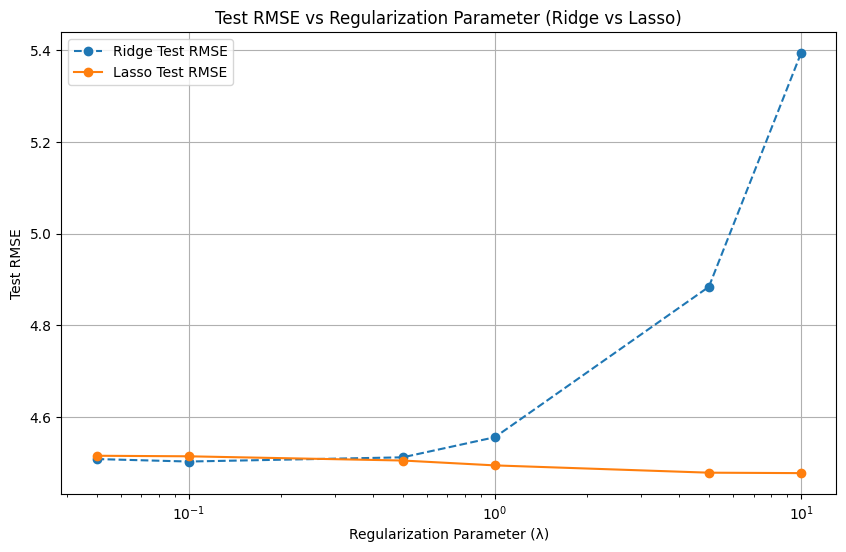

In [8]:
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
X = np.linspace(-2, 2, 100).reshape(-1, 1)
y = (X**4 - 4*X**3 + 16*X + 4*np.random.normal(0, 1, size=X.shape)).flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lambdas = [0.05, 0.1, 0.5, 1, 5, 10]

ridge_test_rmse = []
lasso_test_rmse = []

for reg_lambda in lambdas:
    ridge_model = PolynomialRegressorGD(degree=7, reg_type='ridge', reg_lambda=reg_lambda, learning_rate=0.01, epochs=20000)
    ridge_model.fit(X_train, y_train)
    ridge_y_pred_test = ridge_model.predict(X_test)
    ridge_test_rmse.append(np.sqrt(mean_squared_error(y_test, ridge_y_pred_test)))

    lasso_model = PolynomialRegressorGD(degree=7, reg_type='lasso', reg_lambda=reg_lambda, learning_rate=0.01, epochs=20000)
    lasso_model.fit(X_train, y_train)
    lasso_y_pred_test = lasso_model.predict(X_test)
    lasso_test_rmse.append(np.sqrt(mean_squared_error(y_test, lasso_y_pred_test)))

plt.figure(figsize=(10, 6))
plt.plot(lambdas, ridge_test_rmse, label="Ridge Test RMSE", marker="o", linestyle="--")
plt.plot(lambdas, lasso_test_rmse, label="Lasso Test RMSE", marker="o", linestyle="-")
plt.xlabel("Regularization Parameter (λ)")
plt.ylabel("Test RMSE")
plt.title("Test RMSE vs Regularization Parameter (Ridge vs Lasso)")
plt.xscale("log")
plt.legend()
plt.grid(True)
plt.show()

**Can you explain the behaviour of RMSE for both ridge and lasso regularization?**

**Ans:**

Generate a new sample dataset using the following formula:

$$
y = 2 \sin\left(\frac{\pi}{2} x\right) + \frac{1}{2} ϵ \quad , \quad x \in [-4, 4]
$$

where $ ϵ $ represents noise sampled from a $\mathcal{N}(0, 1) $ distribution. Plot the fitted polynomial with degrees ranging from 4 to 12 as well as the RMSE:


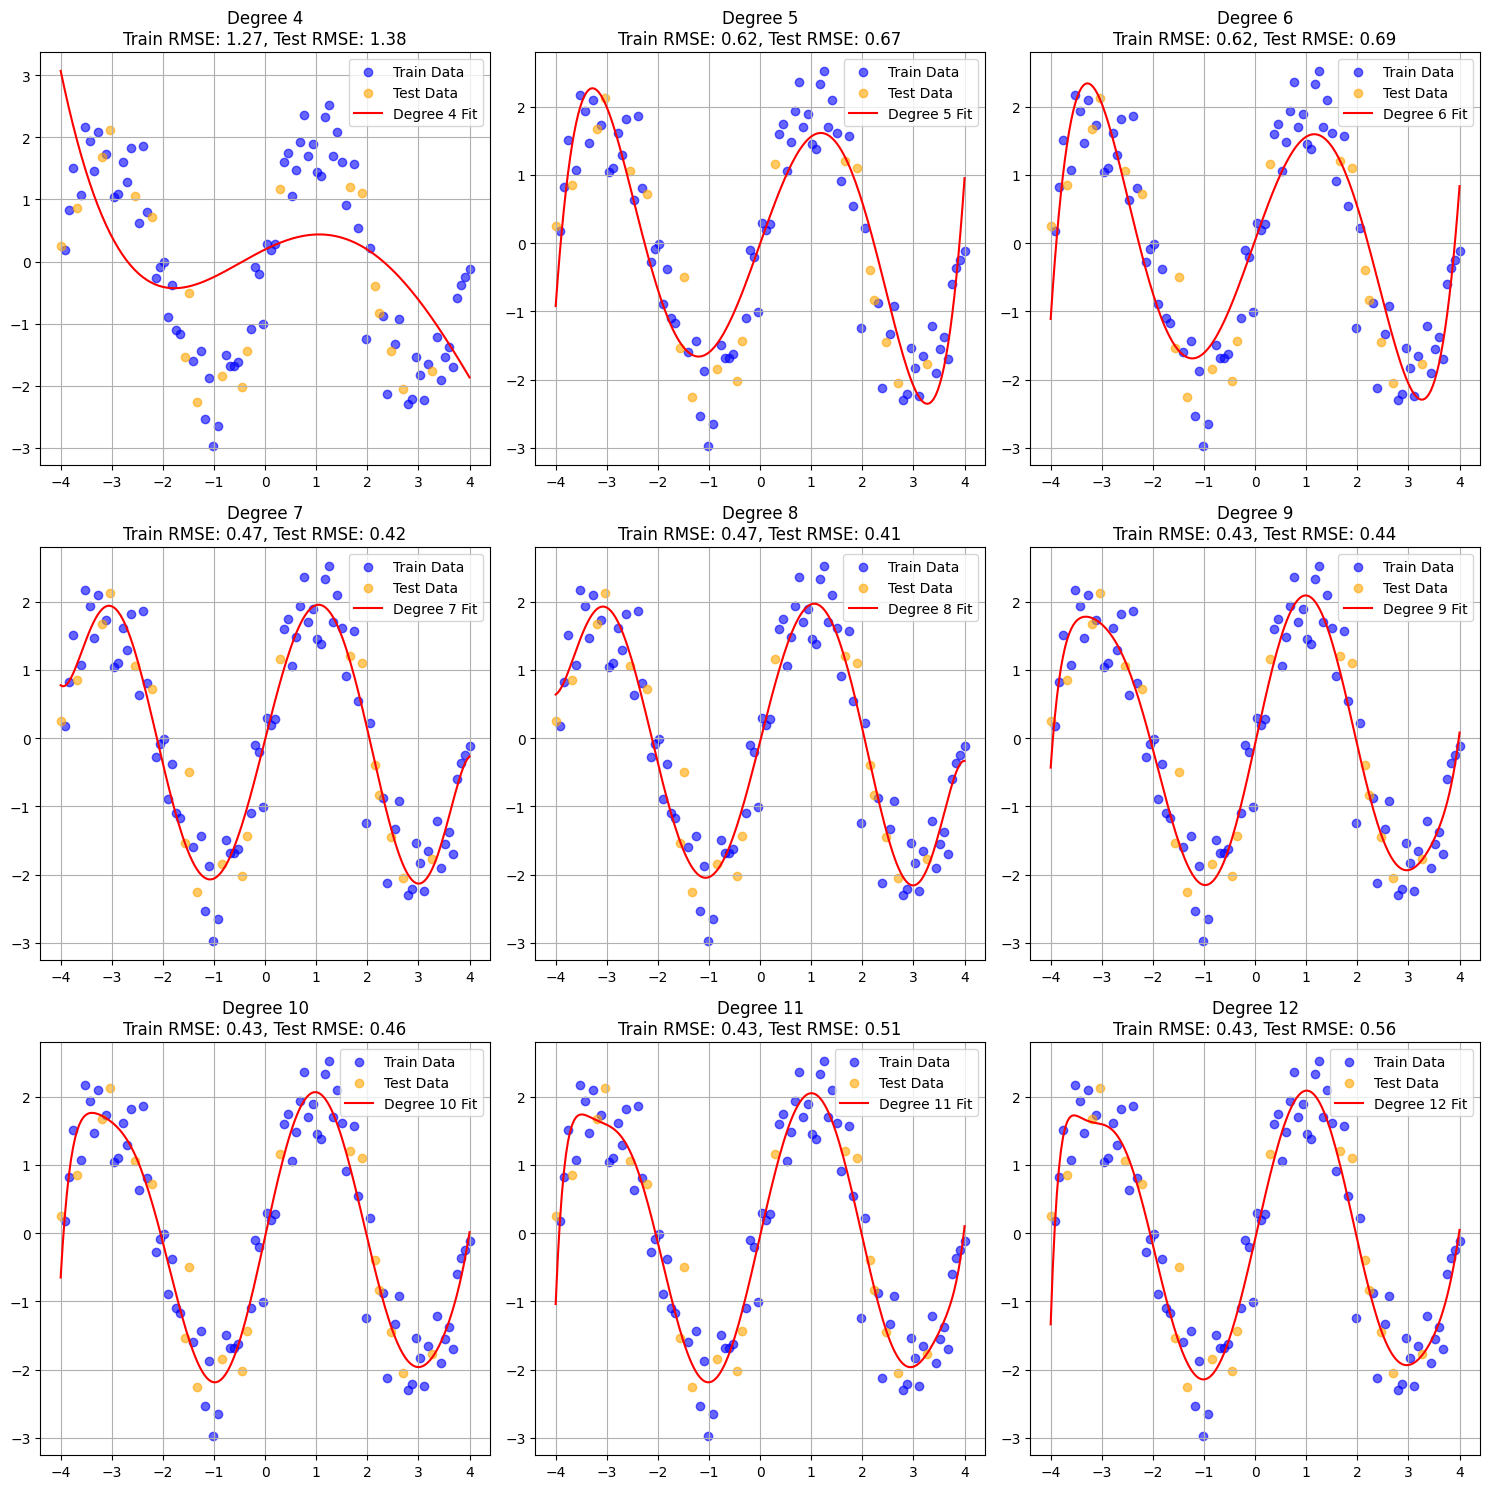

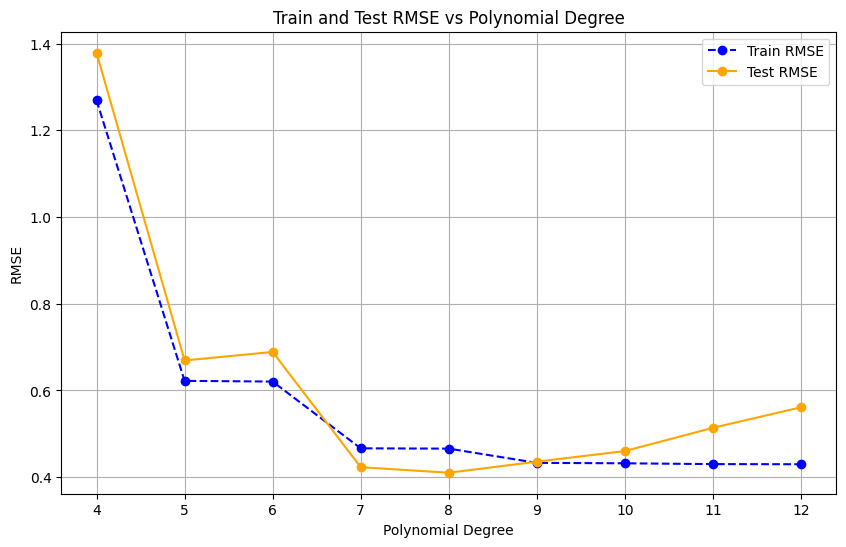

In [9]:
np.random.seed(42)

X = np.linspace(-4, 4, 100).reshape(-1, 1)
epsilon = np.random.normal(0, 1, size=(100, 1))
y = 2 * np.sin((np.pi / 2) * X).flatten() + (0.5 * epsilon).flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = range(4, 13)

train_rmse_values = []
test_rmse_values = []

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, degree in enumerate(degrees):
    poly_regressor = PolynomialRegressor(degree=degree)
    poly_regressor.fit(X_train, y_train)

    y_train_pred = poly_regressor.predict(X_train)
    y_test_pred = poly_regressor.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_rmse_values.append(train_rmse)
    test_rmse_values.append(test_rmse)

    axes[i].scatter(X_train, y_train, color="blue", alpha=0.6, label="Train Data")
    axes[i].scatter(X_test, y_test, color="orange", alpha=0.6, label="Test Data")
    X_plot = np.linspace(-4, 4, 200).reshape(-1, 1)
    y_plot = poly_regressor.predict(X_plot)
    axes[i].plot(X_plot, y_plot, color="red", label=f"Degree {degree} Fit")
    axes[i].set_title(f"Degree {degree}\nTrain RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    axes[i].legend()
    axes[i].grid()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_rmse_values, marker="o", linestyle="--", label="Train RMSE", color="blue")
plt.plot(degrees, test_rmse_values, marker="o", linestyle="-", label="Test RMSE", color="orange")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.title("Train and Test RMSE vs Polynomial Degree")
plt.legend()
plt.grid(True)
plt.show()

**Does this RMSE plot confirm your previous knowledge of the bias-variance tradeoff?**

**Ans:**Yes, the RMSE plot confirms the bias-variance tradeoff. At lower degrees, the model is too simple to capture the complexity of the data, leading to high bias (underfitting). This results in both train and test RMSE being relatively high. As the degree increases, the model becomes more flexible, reducing train RMSE significantly. However, after a certain degree, the model starts overfitting the training data, leading to increased test RMSE as it captures noise and does not generalize well to unseen data. This behavior aligns with the bias-variance tradeoff.


**Could you explain what is the reason behind the change in behavior of RMSE after some degree? (Hint: you may look at the interval chosen)**

**Ans:**The change in RMSE behavior after a certain degree is due to overfitting. When the polynomial degree becomes very high, the model starts to memorize the training data, including noise, rather than learning the underlying pattern. This results in a very low train RMSE but a significant increase in test RMSE as the model fails to generalize to new data points.

The behavior is also influenced by the chosen interval [−4,4]. In this range, the function 2sin((π/2)x) exhibits periodicity, and high-degree polynomials try to approximate this periodic nature by creating oscillations. These oscillations align well with training data but fail to represent the true function outside the sampled data, causing poor test performance.



Using the previously created sample dataset, fit a polynomial regression model of degree 11. Test the RMSE of the model with regularization parameter values $ \{0.05, 0.1, 0.5, 1, 5, 10\} $.  

Plot the results to visualize the effect of $ \lambda $ on model performance.  


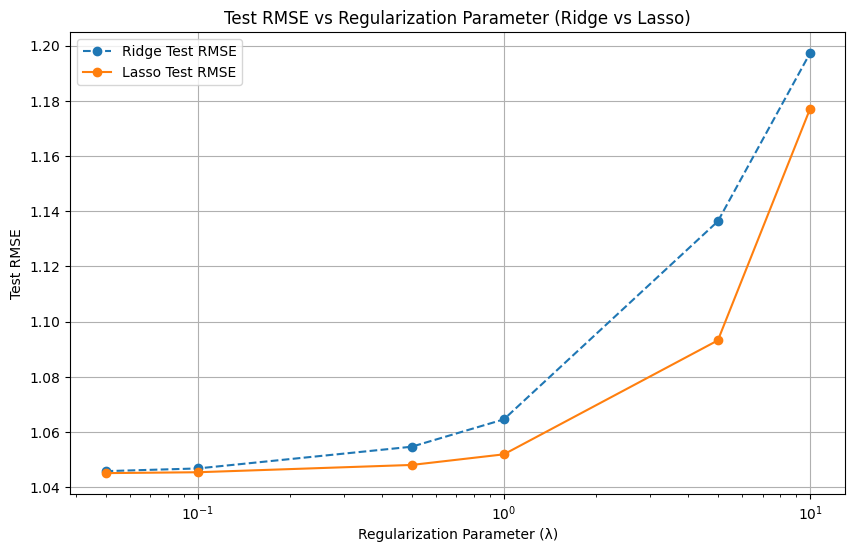

In [10]:

# train the model using required regularization and plot the RMSE
np.random.seed(42)
X = np.linspace(-4, 4, 100).reshape(-1, 1)
epsilon = np.random.normal(0, 1, size=(100, 1))
y = 2 *         np.sin((np.pi / 2) * X).flatten() + (0.5 * epsilon).flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lambdas = [0.05, 0.1, 0.5, 1, 5, 10]

ridge_test_rmse = []
lasso_test_rmse = []

for reg_lambda in lambdas:
    ridge_model = PolynomialRegressorGD(degree=11, reg_type='ridge', reg_lambda=reg_lambda, learning_rate=0.001, epochs=10000)
    ridge_model.fit(X_train, y_train)
    ridge_y_pred_test = ridge_model.predict(X_test)
    ridge_test_rmse.append(np.sqrt(mean_squared_error(y_test, ridge_y_pred_test)))

    lasso_model = PolynomialRegressorGD(degree=11, reg_type='lasso', reg_lambda=reg_lambda, learning_rate=0.001, epochs=10000)
    lasso_model.fit(X_train, y_train)
    lasso_y_pred_test = lasso_model.predict(X_test)
    lasso_test_rmse.append(np.sqrt(mean_squared_error(y_test, lasso_y_pred_test)))

plt.figure(figsize=(10, 6))
plt.plot(lambdas, ridge_test_rmse, label="Ridge Test RMSE", marker="o", linestyle="--")
plt.plot(lambdas, lasso_test_rmse, label="Lasso Test RMSE", marker="o", linestyle="-")
plt.xlabel("Regularization Parameter (λ)")
plt.ylabel("Test RMSE")
plt.title("Test RMSE vs Regularization Parameter (Ridge vs Lasso)")
plt.xscale("log")
plt.legend()
plt.grid(True)
plt.show()

**Can you explain the behaviour of RMSE for both ridge and lasso regularization?**

**Ans:**For Ridge regression, the RMSE increases with higher λ values because the penalty on the coefficients grows, leading to underfitting and a less flexible model. For Lasso regression, RMSE also increases with higher λ values as it shrinks more coefficients to zero, performing feature selection but also leading to underfitting. Overall, Ridge maintains all features but shrinks them, while Lasso can zero out some, which helps in reducing noise and improving RMSE slightly better at high regularization levels. Finding the optimal λ is crucial to balancing bias and variance for both methods.

**What is the main difference between this section and the last section?**

**Ans:**The main difference between the detailed and concise explanations lies in the depth and specificity. The detailed explanation provided an in-depth analysis of how RMSE behaves for Ridge and Lasso regressions with varying regularization parameters (λ), discussing the balance between bias and variance, overfitting, underfitting, and feature selection. It elaborated on the specific effects of different λ levels on the model's flexibility and performance. The concise explanation, however, distilled these key points into a single, succinct paragraph, capturing the essence of the relationship between regularization and RMSE without delving into the finer details. Essentially, the detailed version offers a comprehensive understanding, while the concise version provides a quick, high-level summary.

## Poissson Regression (40 points)

Poisson regression is a type of Generalized Linear Model (GLM) used for modeling count data and event occurrence rates. It assumes that the response variable $y$ follows a Poisson distribution and models the logarithm of the expected value of $y$ as a linear function of the predictors.

### Characteristics
- **Response Variable**: Count data (non-negative integers).
- **Link Function**: Logarithm function.
- **Assumption**: The mean and variance of the response variable are equal (although this can be relaxed in quasi-Poisson models).

### Model Definition
The Poisson regression model can be written as:
$y_i \sim \text{Poisson}(\mu_i)$

where $y_i$ is the observed count for the $i_{th}$ observation, and $\mu_i$ is the expected value of $y_i$.

The relationship between the predictors and $\mu_i$ is expressed as:
$\log(\mu_i) = \mathbf{x}_i^\top \boldsymbol{\beta}$

where:
- $\mathbf{x}_i = [x_{i1}, x_{i2}, \ldots, x_{ip}]^\top$: The vector of predictors for the $i_th$ observation.
- $\boldsymbol{\beta} = [\beta_0, \beta_1, \ldots, \beta_p]^\top$: The vector of coefficients.

Alternatively, in terms of $\mu_i = \exp(\mathbf{x}_i^\top \boldsymbol{\beta})$

### Log-Likelihood Function
The log-likelihood function for Poisson regression is:

$$\ell(\boldsymbol{\beta}) = \sum_{i=1}^n \left[ y_i \log(\mu_i) - \mu_i - \log(y_i!) \right]$$
where $\mu_i = \exp(\mathbf{x}_i^\top \boldsymbol{\beta})$.

### Gradient (Score Function)
The gradient of the log-likelihood with respect to $\beta$ is:
$\frac{\partial \ell}{\partial \boldsymbol{\beta}} = \sum_{i=1}^n \mathbf{x}_i (y_i - \mu_i)$

### Now, write your Poisson Regression class (10 points)

In [11]:
class PoissonRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.beta = None

    def _log_likelihood(self, X, y):
        μ = np.exp(X @ self.beta)
        return np.sum(y * np.log(μ) - μ)

    def _hessian(self, X, μ):
        S = np.diagflat(μ)
        return X.T @ S @ X

    def _gradient(self, X, y, μ):
        return X.T @ (y - μ)

    def _newton_raphson(self, X, y):
        for _ in range(self.epochs):
            μ = np.exp(X @ self.beta)
            gradient = self._gradient(X, y, μ)
            hessian = self._hessian(X, μ)
            self.beta += self.learning_rate * np.linalg.inv(hessian) @ gradient

    def fit(self, X, y):
        X_bias = np.c_[np.ones(X.shape[0]), X]
        self.beta = np.zeros(X_bias.shape[1])
        self._newton_raphson(X_bias, y)

    def predict(self, X):
        X_bias = np.c_[np.ones(X.shape[0]), X]
        return np.exp(X_bias @ self.beta)

### Generate Dataset (10 points)
Generate poisson data using numpy.

In [12]:
np.random.seed(42)
b0 = 1
b1 = 0.15
X = np.random.uniform(0, 10, 100)
λ = np.exp(b0 + b1 * X)
y = np.random.poisson(λ)

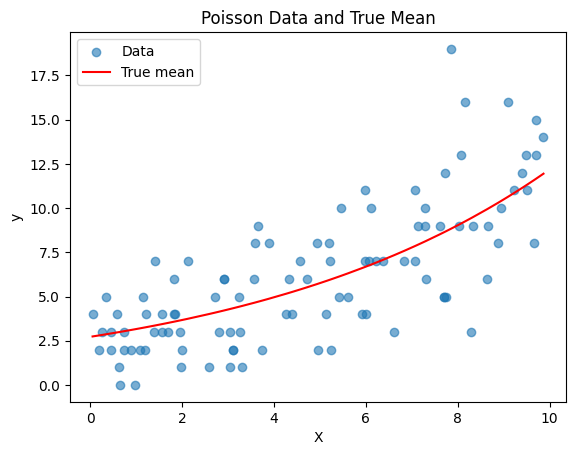

In [13]:
# plot the poisson mean value and the data

plt.scatter(X, y, alpha=0.6, label='Data')
plt.plot(np.sort(X), λ[np.argsort(X)], color='red', label='True mean')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Poisson Data and True Mean')
plt.show()

### Fit poisson regression on data and plot the predicted poisson regression (10 points)

In [14]:
# fit your poisson regression model
model = PoissonRegression(learning_rate=1.0, epochs=100)
model.fit(X.reshape(-1, 1), y)

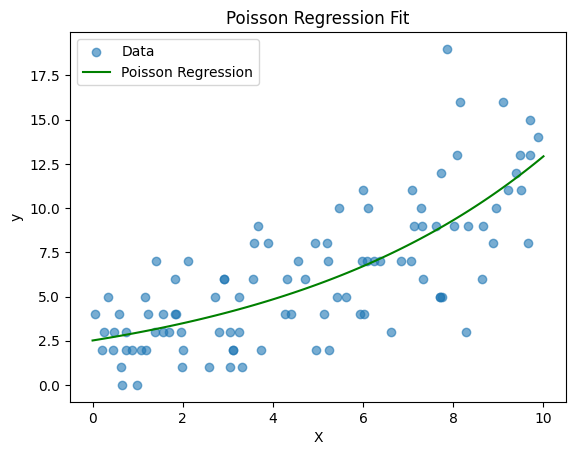

In [15]:
# plot the prediction
X_plot = np.linspace(0, 10, 100)
y_pred = model.predict(X_plot.reshape(-1, 1))

plt.scatter(X, y, alpha=0.6, label='Data')
plt.plot(X_plot, y_pred, color='green', label='Poisson Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Poisson Regression Fit')
plt.show()

### Use different learning rate and plot your prediction (10 points)

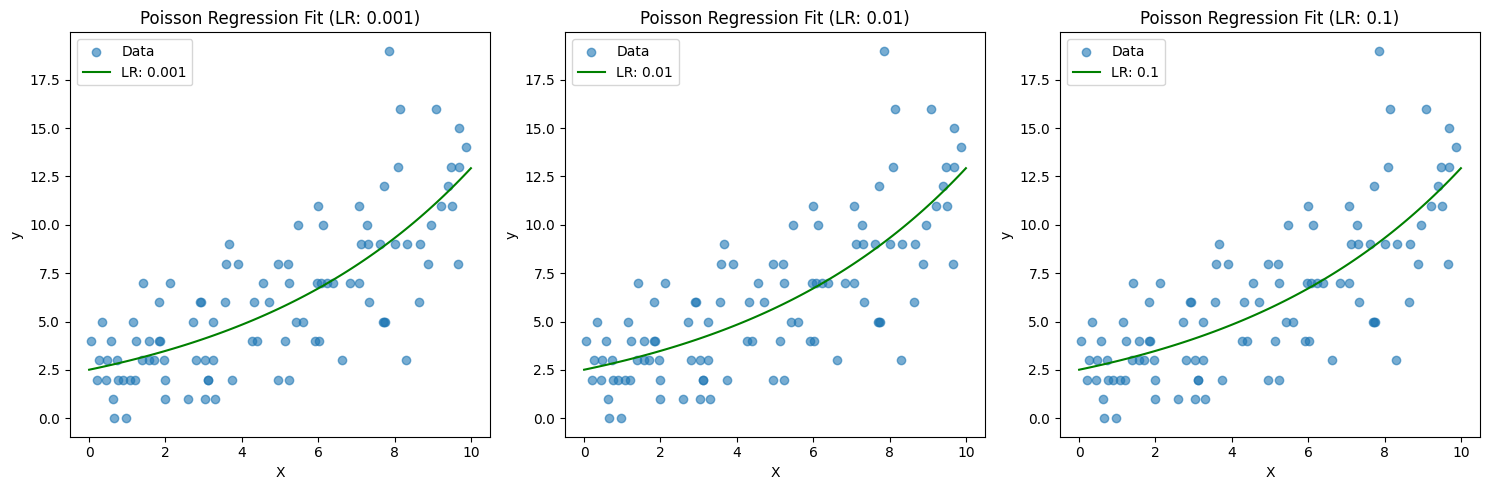

In [16]:
learning_rates = [0.001, 0.01, 0.1]
X_plot = np.linspace(0, 10, 100)
plt.figure(figsize=(15, 5))
for i, lr in enumerate(learning_rates):
    plt.subplot(1, 3, i + 1)
    model = PoissonRegression(learning_rate=lr, epochs=10000)
    model.fit(X.reshape(-1, 1), y)
    y_pred = model.predict(X_plot.reshape(-1, 1))
    plt.scatter(X, y, alpha=0.6, label='Data')
    plt.plot(X_plot, y_pred, color='green', label=f'LR: {lr}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Poisson Regression Fit (LR: {lr})')

plt.tight_layout()
plt.show()